#### Notes on current version:
**To Try**:
- Cayley parameterization](https://planetmath.org/cayleysparameterizationoforthogonalmatrices) of $SU_d$ (since this is really all we need)...*will it be more stable than Lie's parameterization?* Note: it is a homeomorphism so this is great for UAP!
- SVD approach to pre-trainining 
  - (here for procrustes problem)[https://en.wikipedia.org/wiki/Orthogonal_Procrustes_problem]
  - [here for complexity](https://mathoverflow.net/questions/161252/what-is-the-time-complexity-of-truncated-svd)
  
- Get the base version working:

- Add the tall version...

# NEU (Reconfigurations Map and Related Functions)

### Basic Algorithm (NEU-OLS)

1. Perform Basic Algorithm (in this case OLS)
2. Map predictions to their graph; ie $x\mapsto (x,\hat{f}_{OLS}(x))$ where $\hat{f}_{OLS}$ is the least-squares regression function.

## Initializations:

In [32]:
# Deep Learning & ML
import tensorflow as tf
import tensorflow_probability as tfp
import keras as K
import keras.backend as Kb
from keras.layers import *

from keras.models import Model
from keras.models import Sequential
from keras import layers
from keras import utils as np_utils
from scipy import linalg as scila

from tensorflow.keras.initializers import RandomUniform
from tensorflow.keras.constraints import NonNeg



# Linear Regression
from sklearn.linear_model import LinearRegression

# General
import numpy as np
import time

import pandas as pd

# Alerts
import os as beepsnd

# Others
import math

# Visualization
from matplotlib.pyplot import figure

# General Outputs
print('TensorFlow:', tf.__version__)

TensorFlow: 2.1.0


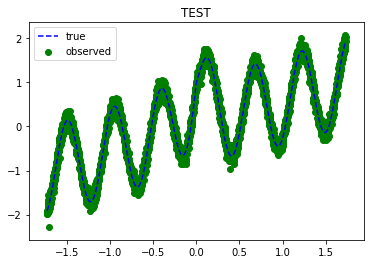

In [37]:
N_Reconfigurations = 20
d = 1 # Dimension of X
D = 1 # Dimension of Y


# Data Meta-Parameters
noise_level = 0.1
uncertainty_level= 0.5

# Training meta-parameters
Pre_Epochs = 10
Full_Epochs = 100

# Depth & Height of first Reconfiguration
Initial_Depth = 20
Initial_Height = 20

# Depth & Height Per Reconfiguration
Depth_per_reconfig = 5
Height_per_reconfig = 20

# Number of Datapoints
N_data = 10**3

# Unknown Function
def unknown_f(x):
    return .1*x + np.exp(-np.abs(x)) + np.sin(2*x)

# Generate Data
%run Data_Generator.ipynb

# Import Custom Layer(s)
%run Special_Layers_Homeomorphic.ipynb

# Import Utility for NEU
%run NEU_Util.ipynb

# Import Benchmarks
%run Benchmarks_Util.ipynb

#### Prepare data for NEU

In [38]:
# Reshape Data Into Compatible Shape
data_x = np.array(data_x).reshape(-1,d)
data_y = np.array(data_y)
# Perform OLS Regression
linear_model = LinearRegression()
reg = linear_model.fit(data_x, data_y)
model_pred_y = linear_model.predict(data_x)
# Map to Graph
data_NEU = np.concatenate((data_x,model_pred_y.reshape(-1,D)),1)
NEU_targets_full  = np.concatenate((data_x,data_y.reshape(-1,D)),1)
NEU_targets  = data_y.reshape(-1,D)

# Train NEU-OLS
- Get Base Model,
- Greedy Layer-Wise Initialization,
- SGD on entire structure.

In [4]:
# Base Model
model = get_base_model(data_NEU,NEU_targets,10,Initial_Depth,Initial_Height)

In [5]:
# Greedy Initialization
NEU_OLS_Greedy_init = model
for i in range(N_Reconfigurations):
    # Update User on Status of Initialization
    print(((i+1)/N_Reconfigurations))
    
    # Update Model
    NEU_OLS_Greedy_init_temp = add_reconfiguration_unit_greedily(NEU_OLS_Greedy_init,
                                                                 data_NEU,
                                                                 NEU_targets_full,
                                                                 Pre_Epochs,
                                                                 Depth_per_reconfig,
                                                                 Height_per_reconfig)
    
    # Check for Blowup
    if math.isnan(np.mean(NEU_OLS_Greedy_init.predict(data_NEU))):
        NEU_OLS_Greedy_init = NEU_OLS_Greedy_init
        break
    else: #Update Model if not explosion
        NEU_OLS_Greedy_init = NEU_OLS_Greedy_init_temp
    
    #-------------#
    # Update User #
    #-------------#
    print(np.mean(np.abs((NEU_OLS_Greedy_init.predict(data_NEU) - NEU_targets_full)**2)))

#----------------------------------------#
# Update User of Pre-Training Completion #
#----------------------------------------#


0.1
0.6755986027330135
0.2
2.827419230323732
0.3
0.659883787332847
0.4
2.7676448841649934
0.5
1.8895871169499063
0.6
1.6339065097139562
0.7
1.6133324207495432
0.8
0.8145715638400871
0.9
3.005353607770534
1.0
1.1291432599433333


Next we train NEU-OLS, by unfreezing the greedily initialized layers and using SGD on the whole structure.

In [39]:
NEU_OLS = build_reconfiguration(model_greedy_initialized=NEU_OLS_Greedy_init, 
                                trainx = data_NEU, 
                                trainy = NEU_targets, 
                                Full_Epochs_in = Full_Epochs, 
                                height = Height_per_reconfig)

Train on 3334 samples
Epoch 1/100
3334/3334 [==============================] - 18s 5ms/sample - loss: 1319584.1069 - mse: 1.2302 - mae: 0.9078
Epoch 2/100
3334/3334 [==============================] - 2s 517us/sample - loss: 421049.0027 - mse: 1.1310 - mae: 0.8723
Epoch 3/100
3334/3334 [==============================] - 2s 468us/sample - loss: 269538.4850 - mse: 1.0878 - mae: 0.8558
Epoch 4/100
3334/3334 [==============================] - 2s 467us/sample - loss: 208455.9887 - mse: 1.0604 - mae: 0.8449
Epoch 5/100
3334/3334 [==============================] - 2s 467us/sample - loss: 171938.1770 - mse: 1.0385 - mae: 0.8361
Epoch 6/100
3334/3334 [==============================] - 2s 539us/sample - loss: 148456.1507 - mse: 1.0229 - mae: 0.8299
Epoch 7/100
3334/3334 [==============================] - 2s 531us/sample - loss: 129833.9489 - mse: 1.0084 - mae: 0.8241
Epoch 8/100
3334/3334 [==============================] - 2s 557us/sample - loss: 120135.9996 - mse: 0.9974 - mae: 0.8194
Epoch 9/10

3334/3334 [==============================] - 2s 452us/sample - loss: 41839.8052 - mse: 0.8213 - mae: 0.7500
Epoch 69/100
3334/3334 [==============================] - 2s 493us/sample - loss: 41611.8732 - mse: 0.8200 - mae: 0.7496
Epoch 70/100
3334/3334 [==============================] - 2s 461us/sample - loss: 41341.1019 - mse: 0.8188 - mae: 0.7491
Epoch 71/100
3334/3334 [==============================] - 2s 468us/sample - loss: 41252.6108 - mse: 0.8176 - mae: 0.7487
Epoch 72/100
3334/3334 [==============================] - 1s 433us/sample - loss: 41020.4726 - mse: 0.8164 - mae: 0.7483
Epoch 73/100
3334/3334 [==============================] - 2s 483us/sample - loss: 40832.5320 - mse: 0.8152 - mae: 0.7479
Epoch 74/100
3334/3334 [==============================] - 2s 485us/sample - loss: 40612.7122 - mse: 0.8141 - mae: 0.7475
Epoch 75/100
3334/3334 [==============================] - 2s 469us/sample - loss: 40396.2242 - mse: 0.8129 - mae: 0.7471
Epoch 76/100
3334/3334 [=====================

In [12]:
Deep_GLd = get_base_model_deep_GLd(data_NEU,
                                   NEU_targets,
                                   Full_Epochs_in = Full_Epochs, 
                                   depth = (N_Reconfigurations*Initial_Depth))

Train on 3334 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100

In [13]:
Deep_Ed=get_base_model_deep_Euclidean_Networks(data_NEU,
                                               NEU_targets,
                                               Full_Epochs_in = Full_Epochs, 
                                               depth = (N_Reconfigurations*Initial_Depth))

Train on 3334 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100

## Make Predictions

In [46]:
# # Predictions (for comparison: TEMP)
NEU_OLS_single_unit_prediction = model.predict(data_NEU)
NEU_OLS_greedy_initializations = NEU_OLS_Greedy_init.predict(data_NEU)
NEU_OLS_prediction = NEU_OLS.predict(data_NEU)
Deep_GLd_prediction = Deep_GLd.predict(data_NEU)
Deep_Ed_prediction = Deep_Ed.predict(data_NEU)

#### Record Error(s)/Prediction Quality

In [47]:
Results_MAE = np.array([np.mean(np.abs(NEU_OLS_prediction  - true_y)),
np.mean(np.abs(Deep_GLd_prediction  - true_y)),
np.mean(np.abs(Deep_Ed_prediction - true_y))])


Results_MinE = np.array([np.min(np.abs(NEU_OLS_prediction  - true_y)),
np.min(np.abs(Deep_GLd_prediction  - true_y)),
np.min(np.abs(Deep_Ed_prediction - true_y))])

Results_MaxE = np.array([np.max(np.abs(NEU_OLS_prediction  - true_y)),
np.max(np.abs(Deep_GLd_prediction  - true_y)),
np.max(np.abs(Deep_Ed_prediction - true_y))])

# Write to DataFrame
Results = pd.DataFrame({'MAE': Results_MAE,
                        'MinE': Results_MinE, 
                        'MaxE': Results_MaxE},
                        index={'NEU-OLS','Deep GLd','Deep ED'})

# Visualize Predictions

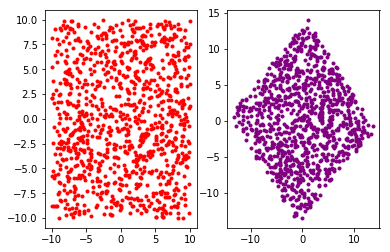

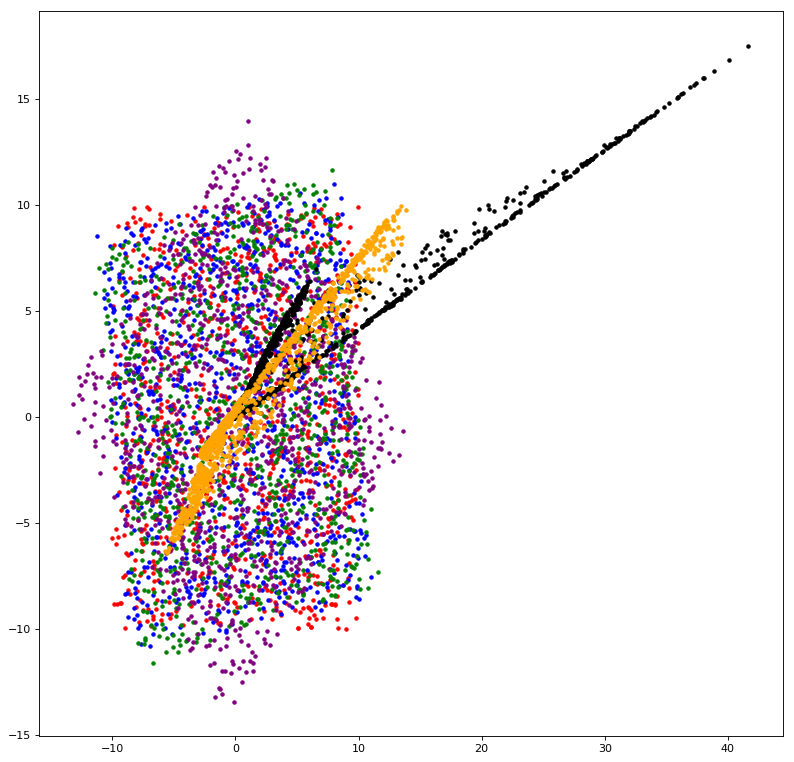

In [48]:
#---------------------------#
# Generate Transformed Data #
#---------------------------#
# Initialization of Grid
visualization_grid = np.random.uniform(-10,10,[10**3,2])
# Transform Data
NEU_OLS_prediction_visualization_init = model.predict(visualization_grid)
NEU_OLS_prediction_visualization_Greedy = NEU_OLS_Greedy_init.predict(visualization_grid)
NEU_OLS_prediction_visualization = NEU_OLS.predict(visualization_grid)
Deep_GLd_prediction_visualization = Deep_GLd.predict(visualization_grid)
Deep_Ed_prediction_visualization = Deep_Ed.predict(visualization_grid)


#----------------#
# Generate Plots #
#----------------#
plt.subplot(1, 2, 1)
plt.scatter(visualization_grid[:,0],visualization_grid[:,1],color='red',marker = '.')
plt.subplot(1, 2, 2)
plt.scatter(NEU_OLS_prediction_visualization[:,0],NEU_OLS_prediction_visualization[:,1],color='purple',label='NEU',marker = '.')

# Initialization
figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Plot Data
plt.scatter(visualization_grid[:,0],visualization_grid[:,1],color='red',marker = '.')

# Plot Transformed Data
plt.scatter(NEU_OLS_prediction_visualization_init[:,0],NEU_OLS_prediction_visualization_init[:,1],color='b',label='Init',marker = '.')
plt.scatter(NEU_OLS_prediction_visualization_Greedy[:,0],NEU_OLS_prediction_visualization_Greedy[:,1],color='g',label='NEU_Greedy',marker = '.')
plt.scatter(NEU_OLS_prediction_visualization[:,0],NEU_OLS_prediction_visualization[:,1],color='purple',label='NEU',marker = '.')
plt.scatter(Deep_GLd_prediction_visualization[:,0],Deep_GLd_prediction_visualization[:,1],color='black',label='Deep_GLd',marker = '.')
plt.scatter(Deep_Ed_prediction_visualization[:,0],Deep_Ed_prediction_visualization[:,1],color='orange',label='Deep_Ed',marker = '.')

Detailed Visualization... evolution of NEU through training

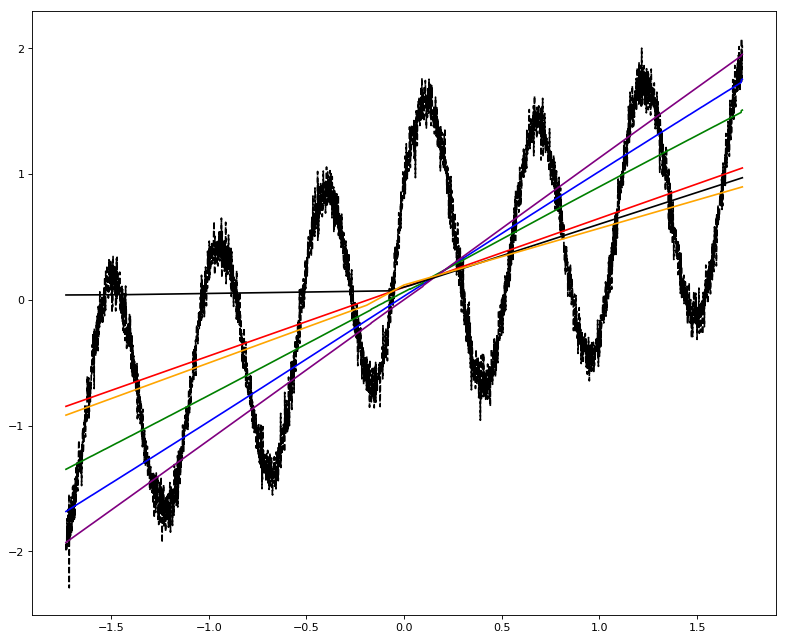

In [49]:
# Adjust Figure Details
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

# Data Plot
plt.plot(data_x,data_y,color='k',label='true',linestyle='--')

# Plot Models
plt.plot(data_x,model_pred_y,color='red',label='OLS')
plt.plot(data_x,NEU_OLS_single_unit_prediction[:,1],color='blue',label='NEU_Unit')
plt.plot(data_x,NEU_OLS_greedy_initializations[:,1],color='green',label='NEU_Greedy_Init')
plt.plot(data_x,NEU_OLS_prediction[:,1],color='purple',label='NEU-OLS')
plt.plot(data_x,Deep_GLd_prediction[:,1],color='black',label='Deep_GLd')
plt.plot(data_x,Deep_Ed_prediction[:,1],color='orange',label='Deep_Ed')

Succinct graph (results only)

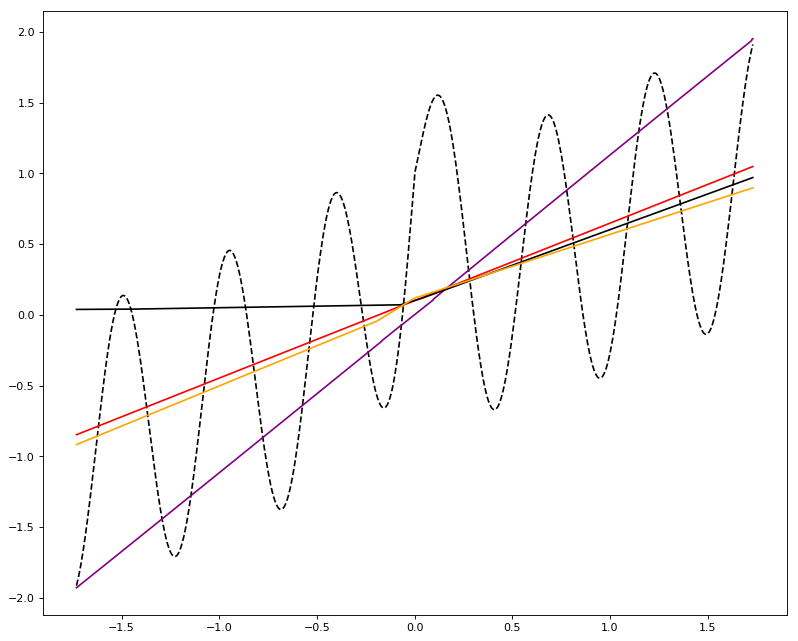

In [50]:
# Adjust Figure Details
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

# Data Plot
plt.plot(data_x,true_y,color='k',label='true',linestyle='--')

# Plot Models
plt.plot(data_x,model_pred_y,color='r',label='OLS')
plt.plot(data_x,NEU_OLS_prediction[:,1],color='purple',label='NEU-OLS')
plt.plot(data_x,Deep_GLd_prediction[:,1],color='black',label='Deep_GLd')
plt.plot(data_x,Deep_Ed_prediction[:,1],color='orange',label='Deep_Ed')

 ---

# Report Results

In [51]:
Results

,MAE,MinE,MaxE
Deep GLd,0.732839,0.000536,1.820504
Deep ED,0.697710,0.000170,1.951824
NEU-OLS,0.645903,0.000296,1.475744


#### The END